In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error

Import the Data and read it 

In [5]:
df=pd.read_csv('https://bit.ly/UsersBehaviourTelco')
df.head(20)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
df.shape

(3214, 5)

Splitting the dataset into test, validation and training sets

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25, random_state=12345)

features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

In [55]:
features_test.shape

(804, 4)

Now split the training dataset into training and validation data

In [7]:
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=12345)

features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

In [56]:
features_train.shape

(1807, 4)

In [57]:
features_valid.shape

# dataset split into 25% test data and 75% training data that was then further 
#split into 75% training data and 25% validating data 

(603, 4)

Train using different models to investigate the results and identify best model

Model 1: Decision Tree Model

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

#create a model
tree_model = DecisionTreeRegressor(max_depth=265) #265 had the best RMSE value
tree_model.fit(features_train,target_train) # train model on training set

#get the test RMSE value using the validating dataset
predictions = tree_model.predict(features_valid)
answers = target_valid

mse= mean_squared_error(answers,predictions)
rmse = mse**0.5
print('RMSE:',rmse)

RMSE: 0.5118820345031635


Decision Tree regressor appeared to have a RMSE of 0.511 at max_depth of 265
when using validating data to test for the lowest RMSE. We will review Random Forest Regression next to try and get a lower RMSE

Model 2: Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

#create a model
final_model = RandomForestRegressor(n_estimators=170, random_state=54321)# initialize constructor for model that had the best RMSE value
final_model.fit(features_train,target_train) # train model on training set

#get the test RMSE value using the validating dataset
predictions = final_model.predict(features_valid)
answers = target_valid

mse= mean_squared_error(answers,predictions)
rmse = mse**0.5
print('RMSE:',rmse)

RMSE: 0.3729670497895618


Random Forst regressor appeared to have a lower RMSE of 0.372 at n_estimator between 150 and 200 when using validating data to test for the lowest RMSE. We will review Linear Regression next to try and get a lower RMSE

Model 3: Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

#create a model
linear_model = LinearRegression().fit(features_train,target_train)# initialize constructor for model that had the best RMSE value
# train model on training set

#get the test RMSE value using the validating dataset
predictions = linear_model.predict(features_valid)
answers = target_valid

mse= mean_squared_error(answers,predictions)
rmse = mse**0.5
print('RMSE:',rmse)

RMSE: 0.4440532309301184


Linear regression appeared to have a middle RMSE of 0.44. showing that the random forest regressor model was the highest quality model, due to the lowest rmse of 0.327 after chnaging hyperparameters, as compared to linear regression and decision tree models. 

Next we will review accuracy of the models using an accuracy score and test data instead of validating data

In [47]:
#recreate the random forest regressor model

regressor_model = RandomForestRegressor(n_estimators=170, random_state=42)
regressor_model.fit(features_train,target_train) # train model on training set

#get the test accuracy using the testing dataset
test_predictions = regressor_model.predict(features_test)

#let's also evaluate the accuracy of the model using the test data set
regressor_model.score(features_test, target_test)

0.2237158487699309

In [49]:
# recreate and train linear regression model on training set
linear_model = LinearRegression().fit(features_train,target_train)

#get the test predictions using the test dataset
linear_model.predict(features_test)

#evaluate accuracy of model using test data
linear_model.score(features_test, target_test)

0.08567900827698738

In [52]:
# recreate and train decision tree model on training set
decision_model = DecisionTreeRegressor(max_depth=265, random_state = 42)

# fit the regressor with X and Y data
decision_model.fit(features_train, target_train)

#we can test the model using test data sets
decision_model.predict(features_test)

#let's also evaluate the accuracy of the model using the test data set
decision_model.score(features_test,target_test)

-0.3095524126088012

When checking accuracy of each model, we find that random forest regressor has the highest accuracy at 22%, compared to 8% accuracy on linear regression and -30% on decision tree model. Meaning the model likely to predict customers new plan correctly would be random forest, however, 22% accuracy is still low as it amounts to less than a quarter. 

Finally, we sanity check our chosen model: Random Forest Regressor.


0.000000    26
0.029412    25
0.017647    24
0.005882    20
0.023529    18
            ..
0.494118     1
0.441176     1
0.594118     1
0.835294     1
0.364706     1
Length: 152, dtype: int64


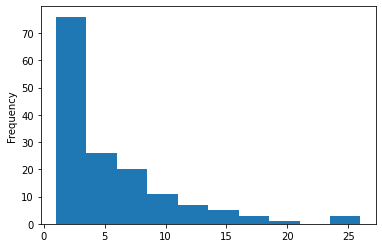

In [54]:
model = RandomForestRegressor(n_estimators=170, random_state=42)
model.fit(features_train, target_train)

# to make value_counts() work,  we converted results to pd.Series
predicted_test = pd.Series(model.predict(features_test))

class_frequency = predicted_test.value_counts()
print(class_frequency)

class_frequency.plot(kind='hist' , x=class_frequency);